<center><h1>INF-552 Lab 0</h1></center>
<br>
<center><font size="4">Introduction to Basic Development Tools</font></center>

### Rules

1. Please read the instructions and problem prompts **carefully**.
2. This lab is to give you some basic APIs of numpy, pandas and scikit-learn. Besides, some topics such as how to make your jupyter notebook be a more efficient developing tools, how to use git and GitHub will also be covered. The lab is to be done individually. You may talk to your fellow classmates about general issues ("Remind me again: Which API should I used for doing group by operation to a data set") but about the specifies of how to do these exercises.
3. Along with a similar vein, you can ask the TA for help, but ask questions about **concepts** but not ask the TA to help you debug your code. The TA is here to help, but not to do the work for you.
4. You are welcome to use the class resources and the Internet.
5. Playing with variations. Solve one problems, and then copy the code to a new cell and play around with it. Doing this is the single most important thing when learning programming.
6. This lab will not be graded but the content is highly related to your future programming assignments. So, treat it wisely.
7. All the content having been gone though in the week 1 discussion is just a snapshot of the most basic concepts. **You need to keep study more about Git, GitHub, Pandas, Numpy and Scikit-Learn in order to finish your programming assignments successfully.**
8. Have fun!

### Setup Development Environment

There are many ways to setup the environment. But, I do recommend a simple idea that is using the Anaconda, which is a pre-build python environment with bundles of useful packages.

**To download the Anaconda, go to the following website:
https://www.anaconda.com/distribution/**. Download the correct version based on your operating system and install it step by step.

Then, **configure your PATH environment variable** to make the conda command work. The following command is an easy way to test whether your configuration is correct. If it is, you will see something as like as the sample output.

> **command:**
>
> conda --version
>
> **sample output:**
>
> conda 4.6.12

**Finally, download this jupyter notebook file,** then change the working directory to where its location in terminal, and type the following command to open the jupter notebook and finish the lab.

> **command:** 
> jupyter notebook

In [4]:
import IPython
print(IPython.sys_info())

{'commit_hash': '2486838d9',
 'commit_source': 'installation',
 'default_encoding': 'cp936',
 'ipython_path': 'C:\\Users\\43791\\anaconda3\\envs\\VirtualRunning\\lib\\site-packages\\IPython',
 'ipython_version': '7.16.1',
 'os_name': 'nt',
 'platform': 'Windows-10-10.0.19041-SP0',
 'sys_executable': 'C:\\Users\\43791\\anaconda3\\envs\\VirtualRunning\\python.exe',
 'sys_platform': 'win32',
 'sys_version': '3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC '
                'v.1916 64 bit (AMD64)]'}


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
#%config IPCompleter.use_jedi = False
#%config IPCompleter.greedy=True
#%config Completer.evaluation = 'limited'

### Pandas

#### The read_csv() Method

First, read the documentation about the *read_csv()* method in Pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Then, try to read data from file Salaries.csv to a dataframe, make the column playerID in the csv file as the index column and the first row as the header. Also, skip the second row when reading the file.

In [2]:

path = 'C:/Users/43791/PythonCode/DSCI552_Homework/Salaries.csv'
#index_col define the index to search and displayed firstly to replace the 0,1,2...
#index counted starting from 0
#df.index = df.index + 1 makes index starting from 1
#skiprow specifies the row to ignore starting from 0 index  1 ---second row [1]
df = pd.read_csv(path,index_col='playerID',header=0,skiprows=[1])
df.head(10)



,yearID,teamID,lgID,salary
playerID,,,,
bedrost01,1985,ATL,NL,550000
benedbr01,1985,ATL,NL,545000
campri01,1985,ATL,NL,633333
ceronri01,1985,ATL,NL,625000
chambch01,1985,ATL,NL,800000
dedmoje01,1985,ATL,NL,150000
forstte01,1985,ATL,NL,483333
garbege01,1985,ATL,NL,772000
harpete01,1985,ATL,NL,250000


#### Indexing and Selecting Data

Select the id of the players who are registered in ATL and HOU and whose salary is higher than one million.

In [3]:
#dataframe name can be self-defined
# use (df[] = ...) to represent one condition    use isin() keyword to create a [ATL,HOU] list 

#can't use loc/iloc to select the index column!!!
#use .index .playerID as postfix to display result in array
##wrong answer: filteredframe.iloc[:,0]

#can use .index to visit index in the given dataframe

df[((df['teamID'] == 'ATL') | (df['teamID'] == 'HOU')) & (df['salary'] > 1000000)].index





Index(['hornebo01', 'murphda05', 'suttebr01', 'ryanno01', 'hornebo01',
       'murphda05', 'suttebr01', 'ryanno01', 'griffke01', 'murphda05',
       ...
       'feldmsc01', 'gonzama01', 'gregelu01', 'lowrije01', 'neshepa01',
       'quallch01', 'rasmuco01', 'singljo02', 'sippto01', 'valbulu01'],
      dtype='object', name='playerID', length=595)

#### The describe() Method

Calculate the standard Deviation, first quartile, medium, third quartile, mean, maximum, minimum of the salary in team ATL.

In [94]:
teamATL = df[(df['teamID'] == 'ATL')]
teamATL.salary.describe()

##salaries_data[salaries_data['teamID']=='ATL']['salary'].describe()
#after filtering out the condition, select the 'salary' column for statisitcal analysis

count    8.850000e+02
mean     2.207749e+06
std      3.434320e+06
min      6.000000e+04
25%      3.000000e+05
50%      6.000000e+05
75%      2.400000e+06
max      1.606180e+07
Name: salary, dtype: float64

#### The iterrows() Method

Create a Python dictionary object whose keys are the headers of the dataframe created in the read_csv() exercise and values are Python list objects that contain data corresponding to the headers. (Here, use the iterrows method to iterate each row of the dataframe and copy it to a dictionary. However, there is a easier way. Learn how the to_dict() method works by yourself later)

In [5]:
#Intialize the key manually and keep the value array as NULL
simple_dict  = {'playerID':[],'yearID':[],'teamID':[],'lgID':[],'salary':[]}
for row in df.iterrows():
    
    #iterate every row and return a tuple where row[0] = index for rows in the dataset 
    #row[1] = object created by the data in particular row
    simple_dict['playerID'].append(row[0])
    simple_dict['yearID'].append(row[1].yearID)
    simple_dict['teamID'].append(row[1].teamID)
    simple_dict['lgID'].append(row[1].lgID)
    simple_dict['salary'].append(row[1].salary)
#use to_dict() orient = list    
    
##
#for key, value in dict_from_df.items():
#    print(f"Key: {key}, Value: {value}")

#### Create Dataframe Using the Constructor

Read the documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame and create a dataframe using pd.DataFrame from the dictionary created in the iterrows() exercise. Change the header to "a", "b", "c", ... at creation time.

In [6]:
##use defalut to_dict
pd.DataFrame(df.to_dict())  #this way reserves the index column, maybe is the constructor problem....@

,yearID,teamID,lgID,salary
bedrost01,1995,ATL,NL,750000
benedbr01,1989,ATL,NL,395000
campri01,1986,ATL,NL,600000
ceronri01,1992,MON,NL,230000
chambch01,1986,ATL,NL,769452
...,...,...,...,...
barreaa01,2015,WAS,NL,514200
dendema01,2015,WAS,NL,512972
robincl01,2015,WAS,NL,525000
taylomi02,2015,WAS,NL,508700


In [10]:
df = pd.DataFrame(simple_dict)

#no direct method to rename the column during the dataframe construction, col attribute use to initialize a unamed frame
#inplace = true modify the column name in the original dataframe
r_df = df.rename(columns={'playerID':'A','yearID':'B','teamID':'C','lgID':'D','salary':'E'},inplace=False)
r_df
#r_df.set_index('A')  #set the index



,A,B,C,D,E
0,bedrost01,1985,ATL,NL,550000
1,benedbr01,1985,ATL,NL,545000
2,campri01,1985,ATL,NL,633333
3,ceronri01,1985,ATL,NL,625000
4,chambch01,1985,ATL,NL,800000
...,...,...,...,...,...
25569,treinbl01,2015,WAS,NL,512800
25570,ugglada01,2015,WAS,NL,507500
25571,werthja01,2015,WAS,NL,21000000
25572,zimmejo02,2015,WAS,NL,16500000


### Numpy

Quick start: https://www.numpy.org/devdocs/user/quickstart.html

Numpy axes explaination: https://www.sharpsightlabs.com/blog/numpy-axes-explained/

#### The np.array Method

Example 1:

```python
ls = [1, 2, 3]
arr = np.array(ls)
```

Example 2:
```python
>>> np.array([[1, 2], [3, 4]])
array([[1, 2],
       [3, 4]])
```

Now, create a 2-dimensional Python list object, then convert it to a Numpy array object.

In [25]:
#create a list
s_list = [[1,2,3,5],[4,5,6,10],[7,8,9,11]] #list object where each element is a list
print(s_list,type(s_list))

s_array = np.array(s_list)
print(s_array,type(s_array))

[[1, 2, 3, 5], [4, 5, 6, 10], [7, 8, 9, 11]] <class 'list'>
[[ 1  2  3  5]
 [ 4  5  6 10]
 [ 7  8  9 11]] <class 'numpy.ndarray'>


#### ndarray Objects' Attributes

Play with the **ndim, shape, size, dtype, itemsize and data** attribute.

Example:

```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.ndim
2
```

In [26]:
print('Dimension of the simple array is:',s_array.ndim)  #2 dimensional array axis
print('Shape of the simple array is:',s_array.shape)
print('Datatype for each element within the array is:',s_array.dtype)
print('Size of this array is:',s_array.size)
print('Size of each element within the array is:',s_array.itemsize)  #integer is 32bits = 4 bytes
print('The start address in memory for this array:',s_array.data)#Python buffer object pointing to the start of the array’s data

Dimension of the simple array is: 2
Shape of the simple array is: (3, 4)
Datatype for each element within the array is: int32
Size of this array is: 12
Size of each element within the array is: 4
The start address in memory for this array: <memory at 0x0000018A902D61F8>


#### Dimension of ndarray Ojects

Play with the reshape() and flatten() method.

Example:
```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.flatten()
array([1, 2, 3, 4])
```

In [30]:
reshape_array =  s_array.reshape(2,6)  #2 rows 6 columns 
print(reshape_array)

print(s_array)

flatten_array = s_array.flatten()
print(flatten_array)  #one dimensional array

[[ 1  2  3  5  4  5]
 [ 6 10  7  8  9 11]]
[[ 1  2  3  5]
 [ 4  5  6 10]
 [ 7  8  9 11]]
[ 1  2  3  5  4  5  6 10  7  8  9 11]


#### The Slice Operation of ndarray Objects

Understand how the slice operation works for 1-D array and 2-D array.

Example:

```python
>>> arr = np.array([[1, 2, 3], [3, 4, 6], [7, 8, 9]])
>>> arr[1:]
array([[3, 4, 6],
       [7, 8, 9]])
>>> arr[1:, 0:2]
array([[3, 4],
       [7, 8]])
```

In [41]:
#start,end-1, step to slice the 1D/2D array
#comma to separate row and column

lst = np.array([0,1,2,3,4])  #1D
print(lst.shape)
print(lst[0])
print(lst[:2])

arr = np.array([[1,2,3],[4,5,6],[7,8,9]])

print('\n',arr)

print("\n2 row")
print(arr[1])   #slice the second column, C-style representation

print("\n2,3 rows") #start at the second row, end at infinite(end position), step =1
print(arr[1:])

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!  It transforms the fetching elements into a list
print("\n2 column") #select elements from all the rows and the second column
print(arr[:, 1])

print("\n2,3 column") #select elements from all the rows and the column started from second to last one
print(arr[:, 1:])

print("\nintersection of 2,3 rows and 0,1 columns") #select second-last rows, first-second columns
print(arr[1:,0:2])



(5,)
0
[0 1]

 [[1 2 3]
 [4 5 6]
 [7 8 9]]

2 row
[4 5 6]

2,3 rows
[[4 5 6]
 [7 8 9]]

2 column
[2 5 8]

2,3 column
[[2 3]
 [5 6]
 [8 9]]

intersection of 2,3 rows and 0,1 columns
[[4 5]
 [7 8]]


#### The Calculation of ndarray Objects

Play with the **argmin(), argmax(), min(), max(), mean(), sum(), std(), dot(), square(), sqrt(), abs(). exp(), sign(), mod()** method.

Example:

```python
>>> np.square(array)
array([[ 1,  4,  9],
       [ 9, 16, 36],
       [49, 64, 81]])

```

In [47]:
#sample code all the statstical functions provided in the np module

arr = np.array([[1,2,3,4],[5,6,7,8],[7,8,9,0]])  #initialize the array

print(np.square(arr)) #returns square of each object
print(np.argmin(arr)) ## indicies of minimum values
print(np.argmax(arr)) ##indicies of max value
print(np.min(arr)) ##smallest object
print(np.max(arr)) ##largest object
print(np.mean(arr)) ##avg of objects
print(np.sum(arr)) ##adds up objects
print(np.std(arr)) ##standard deviation

a=[[1,2], [3,4]]
b=[[3,5], [4,5]]
print(a,b)
print(np.dot(a, b)) ## matrix product

print(np.sqrt(arr)) ## square root

arr = np.array([[1,2,-3,4],[5,-6,-7,8],[-7,8,-9,0]])
print(arr)
print(np.abs(arr)) #absoulte value
print(np.exp(arr)) #exponentiate
print(np.sign(arr)) #gives sign for each element

arr2 = np.array([[1,4,-6,2],[2,2,2,2],[-7,8,-9,1]])
print(arr2)
print(np.mod(arr, arr2)) #output is the module for each element


[[ 1  4  9 16]
 [25 36 49 64]
 [49 64 81  0]]
11
10
0
9
5.0
60
2.857738033247041
[[1, 2], [3, 4]] [[3, 5], [4, 5]]
[[11 15]
 [25 35]]
[[1.         1.41421356 1.73205081 2.        ]
 [2.23606798 2.44948974 2.64575131 2.82842712]
 [2.64575131 2.82842712 3.         0.        ]]
[[ 1  2 -3  4]
 [ 5 -6 -7  8]
 [-7  8 -9  0]]
[[1 2 3 4]
 [5 6 7 8]
 [7 8 9 0]]
[[2.71828183e+00 7.38905610e+00 4.97870684e-02 5.45981500e+01]
 [1.48413159e+02 2.47875218e-03 9.11881966e-04 2.98095799e+03]
 [9.11881966e-04 2.98095799e+03 1.23409804e-04 1.00000000e+00]]
[[ 1  1 -1  1]
 [ 1 -1 -1  1]
 [-1  1 -1  0]]
[[ 1  4 -6  2]
 [ 2  2  2  2]
 [-7  8 -9  1]]
[[ 0  2 -3  0]
 [ 1  0  1  0]
 [ 0  0  0  0]]


#### Other Important Methods Inside Module Numpy

Play with the arange(), ones(), zeros(), eye(), linspace(), concatenate() method.

Example:

```python
>>> np.eye(3)
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])
```

In [50]:
#sample code
#arange() create an array of range 0-9, default step is 1
#arrange() can only create one dimensional array
x = np.arange(10)
print('arange(10)')
print(x)

#ones() creates an array full of 1s  2D np.ones([2,3])
ones = np.ones(3)
print('\nones(3)')
print(ones)

#zero() creates an array full of 0s
zero = np.zeros(5)
print('\nzeros(5)')
print(zero)

#eye() Return a 2-D array with ones on the diagonal and zeros elsewhere. --identity matrix
eye = np.eye(4,k=1)  #diagonal upper 1 position
print('\neye(4)')
print(eye)

#linspace() adds the amount of evenly spaced elements you want from the range
#start,stop,number of elements to calcuate the interval value
linspace =  np.linspace(0,9,11)
print('\nlinspace(0,9,11)')
print(linspace)

#concatenate()
#axis=None flatten the original array to 1D and concatenate them
print('\nconcat(ones, zero)')
con = np.concatenate((ones,zero), axis=None)
print(con)

arange(10)
[0 1 2 3 4 5 6 7 8 9]

ones(3)
[1. 1. 1.]

zeros(5)
[0. 0. 0. 0. 0.]

eye(4)
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]

linspace(0,9,10)
[0.  0.9 1.8 2.7 3.6 4.5 5.4 6.3 7.2 8.1 9. ]

concat(ones, zero)
[1. 1. 1. 0. 0. 0. 0. 0.]


### Scikit-Learn

The followings are packages (or methods) in Python (Scikit-Learn and Scipy) that will be frequently used in your programming assignment. So, please read carefully.

- Data Preprocessing (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
    - Standardization: StandardScaler
    - Normalization: MinMaxScaler
    - Quantifing Categorical Features: LabelEncoder. OneHotEncoder
    - Construct Train and Test Set: model_selection.train_test_split
- KNN: KNeighborsClassifier
- Linear Regression: LinearRegression
- Logistic Regression: LogisticRegression, LogisticRegressionCV
- Feature Selection / Model Selection
    - L1 Penalized Regression (Lasso Regression) with Cross-Validation: LassoCV
    - L2 Penalized Regression (Ridge Regression) with Cross-Validation: RidgeCV
    - Cross-Validation: StratifiedKFold, RepeatedKFold, LeaveOneOut, KFold, model_selection.cross_validate, model_selection.cross_val_predict, model_selection.cross_val_score
    - Model Metrics (https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics): accuracy_score, auc, f1_score, hamming_loss, precision_score, recall_score, roc_auc_score
- Decision Tree: DecisionTreeClassifier, DecisionTreeRegressor
- Bootstrap, Ensemble Methods
    - Bootstrap: bootstrapped (https://pypi.org/project/bootstrapped/)
    - Bagging: RandomForestClassifier, RandomForestRegressor
    - Boosting: AdaBoostClassifier, AdaBoostRegressor
- Support Vector Machines (https://scikit-learn.org/stable/modules/svm.html#svm): LinearSVC, LinearSVR
- Multiclass and Multilabel Classification (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.multiclass)
    - One-vs-one Multiclass Strategy: OneVsOneClassifier
    - One-vs-the-rest (OvR) multiclass/multilabel strategy / OneVsRestClassifier
- Unsupervised Learning
    - K-means Clustering: KMeans
    - Hierarchical Clustering: scipy.cluster.hierarchy (not scikit-learn)
- Semisupervised Learning (https://scikit-learn.org/stable/modules/label_propagation.html)

### Matplotlib

**Quick start:** https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

**Exercises:**

(a) Create two one dimensional arrays x and y and plot y vs x, add title, xlabel, ylabel, grid.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

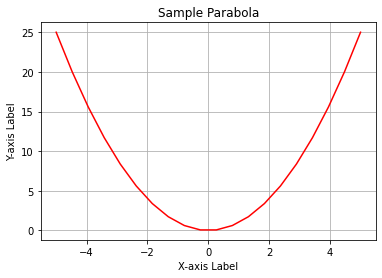

In [54]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])

plt.plot(x,y,color='r')   #set line color,width,style,alpha value
plt.title('Sample Parabola')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.grid()
plt.show()

What happens if the independent variable is not sorted before plotting? Try plotting directly using the following defined array.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])
```

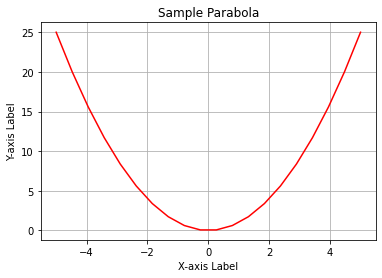

In [58]:
x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])

#firstly sort the x array
sorted_x = sorted(x)
sorted_y = []
for i in sorted_x:
    index = np.where(x == i)
    sorted_y.append(y[index])  #search for index for ith element in the original independent array
                                    #get the corresponding y value
                                    #append it to the sorted dependent array for consistent purpose

plt.plot(sorted_x,sorted_y,color='r')   #set line color,width,style,alpha value
plt.title('Sample Parabola')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.grid()
plt.show()

(b) Create multiple arrays and plot them with different styles, add legends, add text/mathematical equations on the plot.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

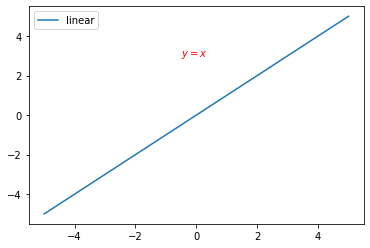

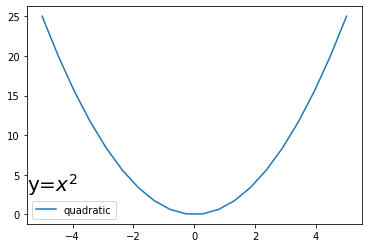

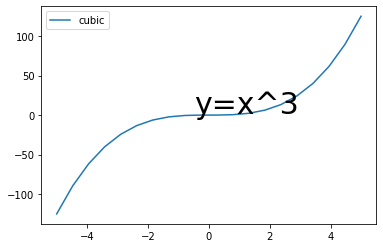

In [71]:
#call plt.show() 3 times to draw 3 different figures
x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

plt.plot(x, y1, label='linear') #add legend text using label variable
plt.legend(loc="best")   #legend location is founded by system
plt.text(-0.5, 3, '$y=x$',color='red') #text location x-axis,y-axis,text,color
plt.show()

plt.plot(x, y2, label='quadratic')
plt.legend(loc="best")
plt.text(-5.5, 3, 'y=$x^2$', fontsize=20) #any anootation like text,title,xlabel,ylabel can modify the fontsize
                                          #add $ sign to format the exponential notation in the figure
plt.show()
        
plt.plot(x, y3, label='cubic')
plt.legend(loc="best")
plt.text(-0.5, 3, 'y=x^3', fontsize=30)
plt.show()

(c) Create multiple arrays and plot them into one figure **(No multiple figure and no subplot is allowed in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

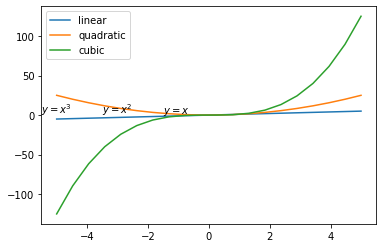

In [73]:
#Call plt.show() only 1 time to integrate 3 curves together
x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

plt.plot(x,y1, label='linear')
plt.plot(x,y2, label='quadratic')
plt.plot(x,y3, label='cubic')
plt.text(-1.5, 3, '$y=x$', fontsize=10)
plt.text(-3.5, 3, '$y=x^2$', fontsize=10)
plt.text(-5.5, 3, '$y=x^3$', fontsize=10)
plt.legend(loc='best')
plt.show()


(d) Create multiple subplots, play around with the figure size, figure title, and its font style and font size **(One curve is plotted in one subplot in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

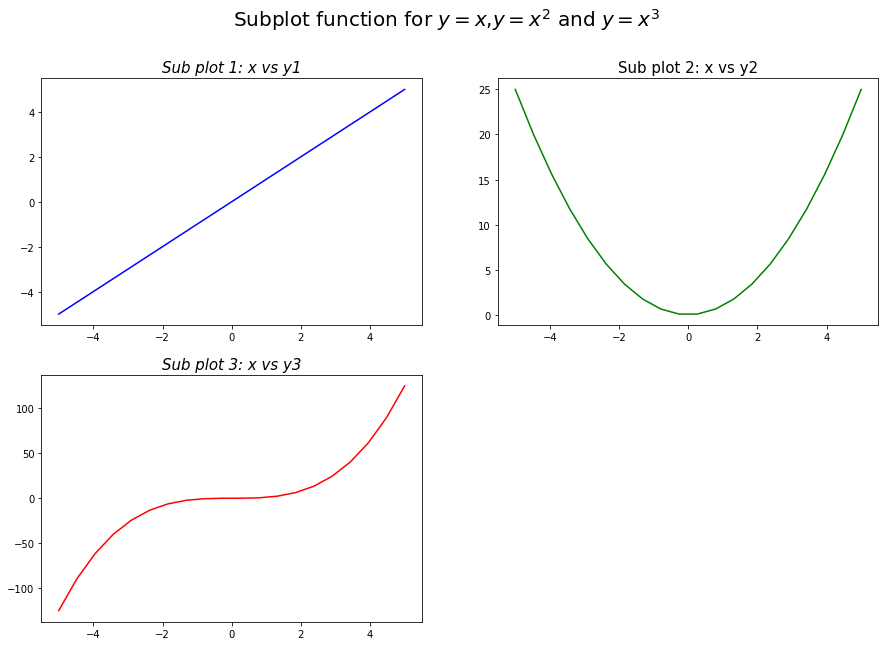

In [82]:
x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

#firstly create a figure object
fig = plt.figure(figsize=(15,10))
fig.suptitle('Subplot function for $y=x$,$y=x^2$ and $y=x^3$',fontsize=20)

plt.subplot(2,2,1)
plt.plot(x,y1,color='b')
plt.title('Sub plot 1: x vs y1',fontsize=15,fontstyle='oblique')

plt.subplot(2,2,2)
plt.plot(x,y2,color='g')
plt.title('Sub plot 2: x vs y2',fontsize=15,fontstyle='normal')

plt.subplot(2,2,3)
plt.plot(x,y3,color='r')
plt.title('Sub plot 3: x vs y3',fontsize=15,fontstyle='italic')

plt.show()

Figure(720x720)
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


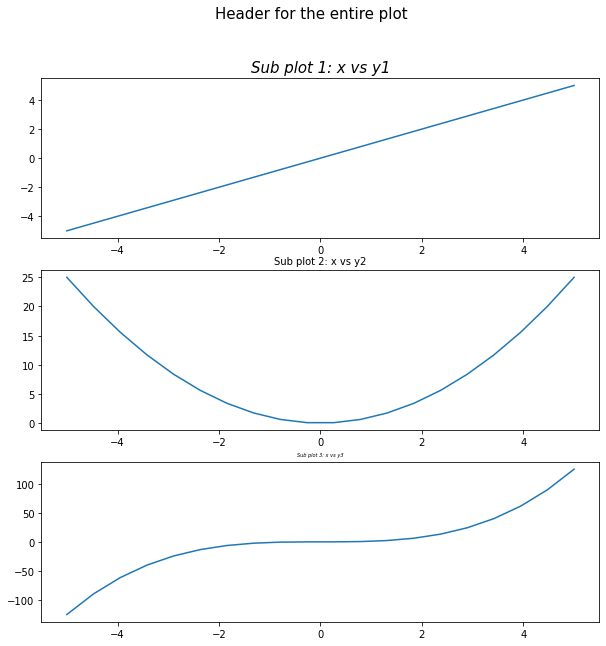

In [81]:
#apply figure and axes object OOP to draw subplots

import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

#return all axes object at a single time fig->axes
fig,axes=plt.subplots(nrows=3,ncols=1,figsize=(10,10))
print(fig)
print(axes)


# Title for the entire plot
#use axes[] indexing each ax object created by plt.subplots and self-defined later on for fontsize, variable,etc...
fig.suptitle("Header for the entire plot",fontsize=15)

# Edit the subplots
axes[0].set_title("Sub plot 1: x vs y1",fontsize=15,fontstyle='oblique')
axes[0].plot(x,y1)


axes[1].set_title("Sub plot 2: x vs y2",fontsize=10,fontstyle='normal')
axes[1].plot(x,y2)


axes[2].set_title("Sub plot 3: x vs y3",fontsize=5,fontstyle='italic')
axes[2].plot(x,y3)

(e) Change the limits on x and y axes, **use logarithmic axes to plot**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

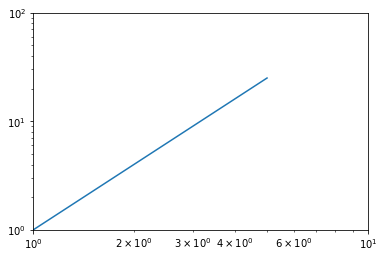

In [83]:
x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])

#for negative part, since log function has no negative definition, x = 0 
#y=a*b^x
plt.xscale('log')
plt.yscale('log')
plt.ylim(ymin=1,ymax=100)
plt.xlim(xmin=1,xmax=10)

plt.plot(x,y)
plt.show()

### Pandas's DataFrame.plot and Seaborn

#### Pandas's DataFrame.plot

Use the Salaries.csv again (You can use the dataframe object loaded from section 3.1).

(a) For team 'ATL', plot a scatter plot between feature yearID and salary.

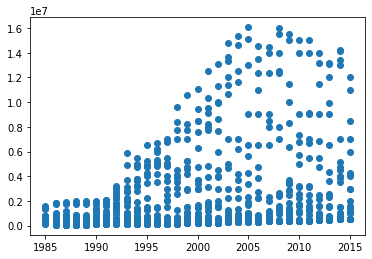

In [84]:
x =  [df[df['teamID']=='ATL'].yearID]
y =  [df[df['teamID']=='ATL'].salary]

plt.scatter(x,y)   #self-defined s = markers size in array representation, color

(b) For year 1985, plot a bar chart to show the average salary for each team.

<BarContainer object of 26 artists>

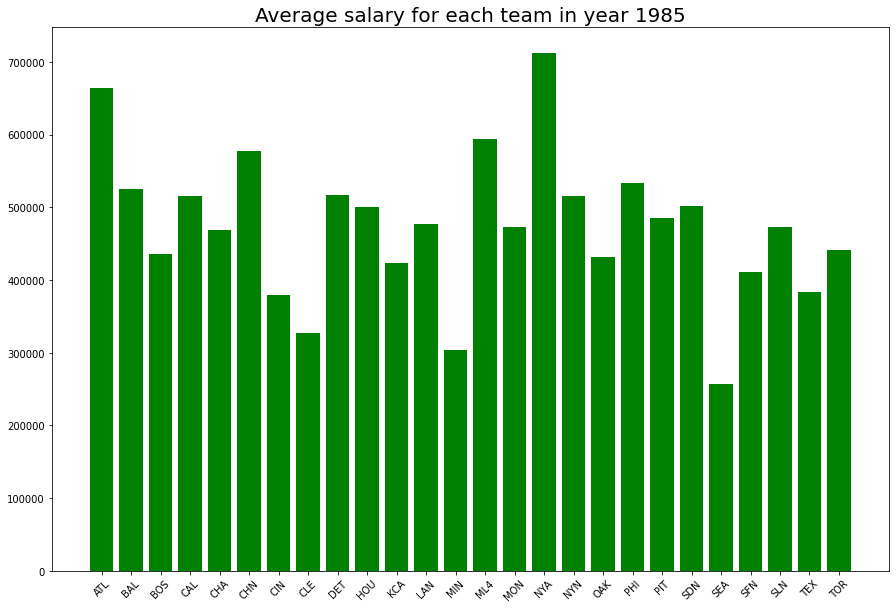

In [112]:
df_1985 = df[df['yearID'] == 1985]
result = df_1985.groupby('teamID').agg({'salary':'mean'}) #dataframe as return value  same as avgsal in the following cells

#extract different components from the result object
x = []
y = []
for row in result.iterrows():
    x.append(row[0])
    y.append(row[1].salary)
    
fig = plt.figure(figsize=(15,10))
plt.title('Average salary for each team in year 1985',fontsize=20)
plt.xticks(rotation=45)
plt.bar(x,y,color='green')

<class 'pandas.core.series.Series'>
teamID
ATL    663666.666667
BAL    525486.909091
BOS    435902.400000
CAL    515281.928571
CHA    468865.619048
CHN    577405.318182
CIN    379996.227273
CLE    327583.300000
DET    517407.150000
HOU    499652.550000
KCA    423689.954545
LAN    476865.956522
MIN    303411.631579
ML4    593900.368421
MON    473508.300000
NYA    711910.200000
NYN    515941.047619
OAK    431362.190476
PHI    532892.947368
PIT    485657.894737
SDN    501662.863636
SEA    256277.777778
SFN    411085.700000
SLN    472683.320000
TEX    383825.000000
TOR    440627.500000
Name: salary, dtype: float64


<AxesSubplot:xlabel='teamID'>

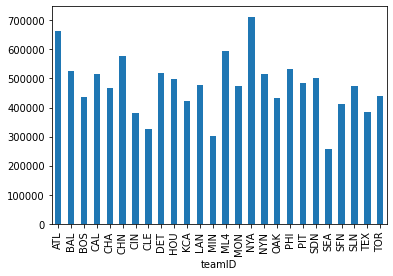

In [115]:
df_new_1985 = (df[df["yearID"]==1985])
avgsal=df_new_1985.groupby('teamID')['salary'].mean()  #return a Panda Series object
print(type(avgsal)) 
print(avgsal)
avgsal.plot(kind='bar')  #only apply to dataframe with 2 columns

(c) For team 'ATL', plot a line chart to show how the annual average salary change by years.

              salary
yearID              
1985    6.636667e+05
1986    5.897512e+05
1987    5.170175e+05
1988    4.389026e+05
1989    3.704111e+05
1990    4.548594e+05
1991    7.361400e+05
1992    1.116946e+06
1993    1.261861e+06
1994    1.646117e+06
1995    1.628808e+06
1996    1.656617e+06
1997    1.686403e+06
1998    1.912062e+06
1999    2.522069e+06
2000    2.817928e+06
2001    2.965683e+06
2002    3.316799e+06
2003    3.934951e+06
2004    3.220804e+06
2005    3.458292e+06
2006    3.108858e+06
2007    3.117530e+06
2008    3.412189e+06
2009    3.335385e+06
2010    3.126802e+06
2011    3.346257e+06
2012    2.856205e+06
2013    3.254501e+06
2014    4.067042e+06
2015    2.990885e+06


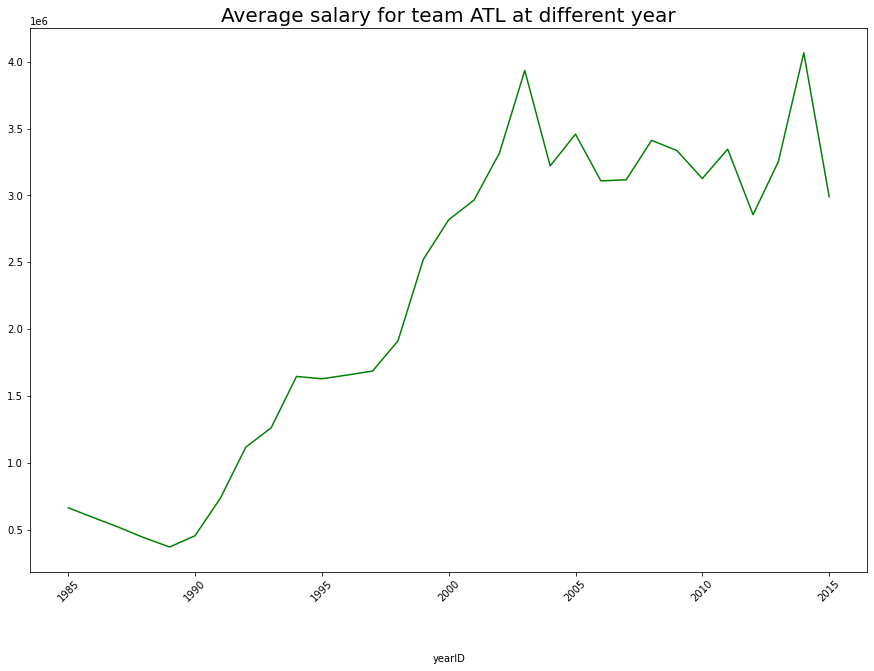

In [130]:
df_ATL = (df[df["teamID"]== 'ATL'])
#print(df_ATL)
avgsal = df_ATL.groupby('yearID').agg({'salary':'mean'})
print(avgsal)

#extract different components from the result object
x = []
y = []
for row in avgsal.iterrows():
    x.append(row[0])
    y.append(row[1].salary)
    
fig = plt.figure(figsize=(15,10))
plt.title('Average salary for team ATL at different year',fontsize=20)
plt.xticks(rotation=45)  #设置标签
xlabel = plt.xlabel('yearID',labelpad=50)
xlabel.set_position((.5, -.1))
plt.plot(x,y,color='green')

#### Seaborn

(a) Append one more numeric feature to the data frame (can be generated randomly), then for team 'ATL', use the seaborn.pairplot to plot scatter plots among all numeric features in the data frame for team. 

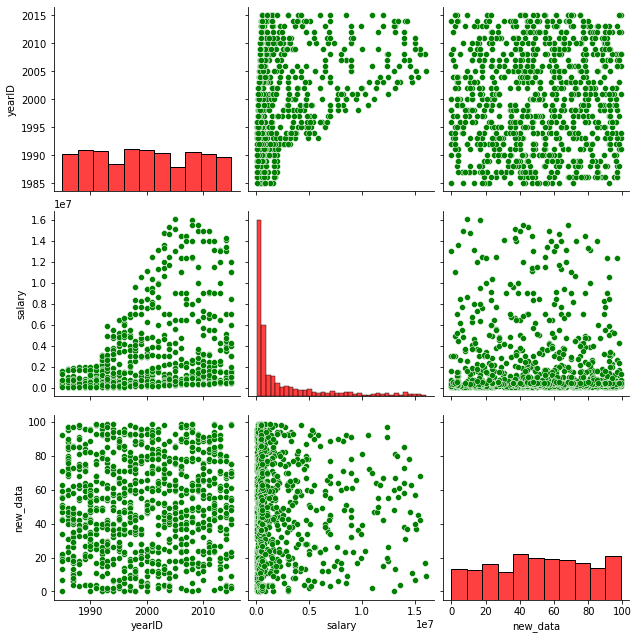

In [171]:
df['new_data'] = np.random.randint(0,100, size=df.shape[0])

ATL = (df[df["teamID"]=="ATL"])
# ATL['Arandom'] = np.random.randint(0,5, size=len(ATL))

import seaborn as sns
#colors = ["pale red","windows blue", "amber", "greyish", "faded green", "dusty purple"]
#palette=sns.xkcd_palette(colors)

#palette=sns.color_palette('Wistia',6)

#-----------------------
#Probably the pairplot without hue ignores the palette, but uses a single color. 
#Seaborn takes these colors from matplotlib's default colors. 
#You can use sns.set_palette('theme') to set your own colors. But be aware that pairplot will only use the
#first color (the dark '#0a2e36' in this case) together with alpha.
sns.pairplot(ATL,plot_kws={'color':'g'},diag_kws={'color':'r'},height=3)

(b) For year 1985 and for each team, plot a boxplot to show how the salary distribute within a team.

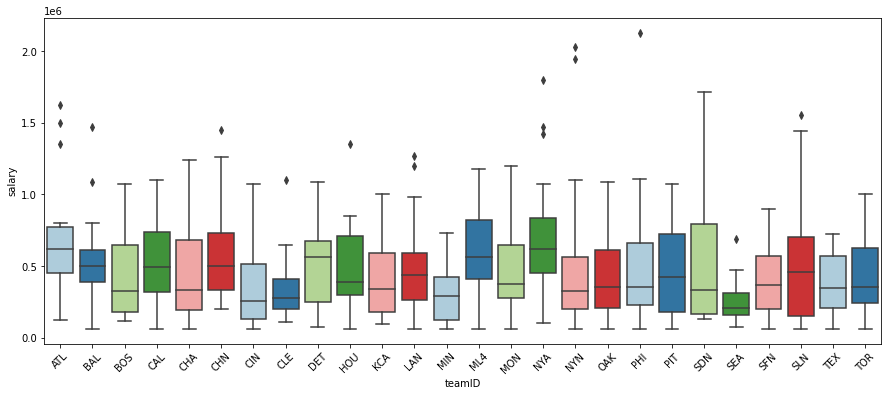

In [163]:
df_1985 = (df[df["yearID"]==1985])

plt.figure(figsize=(15, 6))
palette=sns.color_palette("Paired",6)
bp = sns.boxplot(x="teamID", y="salary", data=df_1985,palette=palette)
plt.xticks(rotation=45)
plt.show()

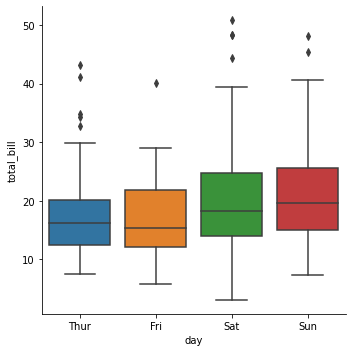

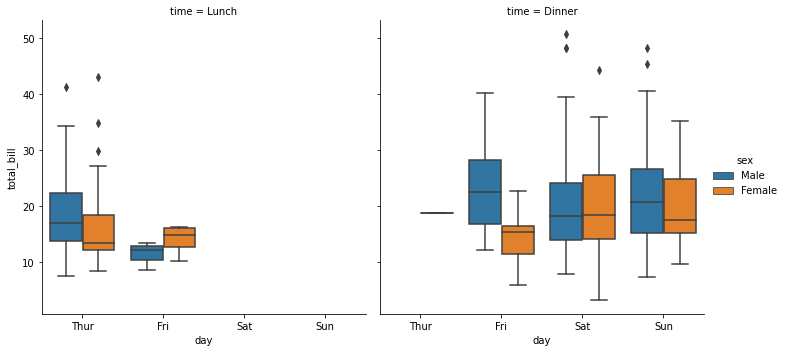

<Figure size 720x432 with 0 Axes>

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用Seaborn内置的数据集
tips = sns.load_dataset('tips')

# 通过kind参数指定要绘制的图表类型，比如'strip'、'swarm'、'box'、'violin'、'boxen'、'point'、'bar'等
sns.catplot(x='day', y='total_bill', data=tips, kind='box')

# 添加其他参数，比如hue、col、row等来显示更多的数据维度
sns.catplot(x='day', y='total_bill', data=tips, kind='box', hue='sex', col='time')

# 设置图表的大小和形状
plt.figure(figsize=(10, 6))

# 显示图表
plt.show()




(c) Read the offical documentation (https://seaborn.pydata.org/) to understand how lmplot, catplot, relplot, and jointplot works.

### Jupyter Notebook

#### Jupyter Notebook Extensions

Extensions such as the code formatter, table of content is to make your development more efficient. To explore it, please refer to https://github.com/ipython-contrib/jupyter_contrib_nbextensions.

#### Jupyter Visual Debugger

The Pixie Debugger is a visual debugger for debugging on Jupyter Notebook. To explore it, please refer to https://medium.com/codait/the-visual-python-debugger-for-jupyter-notebooks-youve-always-wanted-761713babc62.

### Git and GitHub

1. In the directory that where this jupyter notebook file locates in, init a Git repository.
2. Checkout a new branch called dev and commit the current notebook within this branch.
3. Merge the dev branch to the master branch (the default branch).
4. Create a temporary repository (just for practicing and you can delete it later) in GitHub. 
5. Push new changes in the master branch to the remote repository created in step 4.
6. Checkout the dev branch again and do some changes to your notebook, and then repeat step 3 and step 5.